In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input data
x_in_age = np.array([15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11])
x_in_temp = np.array([40, 23.25, 17, 21, 10, 12, 20, 12, 15, 26])
y_in = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=np.int8)
y1_in = 1 - y_in
nx = x_in_age.size

# Combine features and add intercept term
x_in = np.vstack((np.ones(nx), x_in_age, x_in_temp)).T

In [3]:
# Objective function
def objective_function(w):
    z = np.dot(x_in, w)
    z1 = np.log(1 + np.exp(-z))
    z2 = np.log(1 + np.exp(z))
    return np.dot(y_in, z1) + np.dot(y1_in, z2)

In [5]:
# Gradient function
def gradient_function(w):
    z = np.dot(x_in, w)
    hi = 1 / (1 + np.exp(-z))
    yh = hi - y_in
    grad = np.zeros(3)
    grad[0] = np.sum(yh)
    grad[1] = np.dot(yh, x_in[:, 1])
    grad[2] = np.dot(yh, x_in[:, 2])
    return grad

In [6]:
# Line search
def line_search(objective_function, gradient, x):
    beta = 0.1
    stepsize = 1
    trial = 100
    tau = 0.5
    for i in range(trial):
        fx1 = objective_function(x)
        fx2 = objective_function(x - stepsize * gradient)
        c = -beta * stepsize * np.dot(gradient, gradient)
        if fx2 - fx1 <= c:
            break
        else:
            stepsize = tau * stepsize
    return stepsize

In [7]:
# Gradient Descent
maxit = 1000000
epsilon = 1.e-3

w = np.array([-2, 1, 1])

for i in range(maxit):
    gradient = gradient_function(w)
    b = np.linalg.norm(gradient)
    if b < epsilon:
        break
    stepsize = line_search(objective_function, gradient, w)
    w = w - stepsize * gradient
    print(i, b)

minimum_value = objective_function(w)

C:\Users\shrey\AppData\Local\Temp\ipykernel_39188\3944651250.py:4: RuntimeWarning: overflow encountered in exp
  z1 = np.log(1 + np.exp(-z))
C:\Users\shrey\AppData\Local\Temp\ipykernel_39188\3944651250.py:5: RuntimeWarning: overflow encountered in exp
  z2 = np.log(1 + np.exp(z))


0 159.1119311824753
1 78.6590680818038
2 99.1931700847455
3 15.704736134035318
4 34.97719031451776
5 15.754707125129146
6 8.218019352276805
7 10.310587405690555
8 6.280845604644373
9 15.443929135882822
10 6.778628535475859
11 4.2812799253441876
12 5.573922282649215
13 3.599563502268779
14 4.597059960464173
15 3.090760650133071
16 7.776436954621434
17 3.904954145474373
18 2.606381754012784
19 6.217920433507032
20 3.139448328794581
21 4.648056222743473
22 2.6624657778037504
23 3.6157613287481802
24 2.380533691172071
25 5.740841007434359
26 2.926270399787182
27 4.26955109876392
28 2.514973986041937
29 3.338054772445824
30 5.2102411891412235
31 2.8194405670224394
32 4.081189720877908
33 2.483971467446406
34 3.293298672774505
35 5.059853026955178
36 2.7127401857497393
37 3.8165415856869114
38 2.3872275126575846
39 6.118508136219095
40 3.0117548452814153
41 4.47749380380125
42 2.5516705210242017
43 3.452918694974907
44 2.2971684373871755
45 5.416391158238497
46 2.8071491260404025
47 4.041109

685 2.2652917532152137
686 3.313832624852734
687 1.7923210905092073
688 2.317300168612656
689 3.369834795119387
690 1.7620104804180678
691 4.61161208438864
692 2.030798559278998
693 2.8061412167979984
694 1.6470101711348064
695 3.775770825335787
696 1.8394748003778139
697 2.4095830443032704
698 3.5969424135354777
699 1.8498025396264874
700 2.4503180538668654
701 3.617781145788661
702 1.799907329129641
703 2.3266565762066356
704 3.432513963762095
705 1.8031426854216477
706 2.35010906653272
707 3.4276229140000973
708 1.7547801764601076
709 2.2308581269938603
710 3.241587909365246
711 1.7517982631249847
712 2.2384413924026627
713 3.2137792359426935
714 1.7064249121478299
715 4.2994030006552
716 1.929949338223944
717 2.604140667318231
718 1.5892144301522568
719 3.409869565884691
720 1.7378219945831916
721 4.542250674235869
722 1.9740874271643418
723 2.6947408940304407
724 1.5986734601617025
725 3.5226694421188447
726 1.7527597980288334
727 2.2355478661602475
728 3.2472363343395383
729 1.73

1417 1.0765059816956792
1418 1.043726697539351
1419 1.013043433325732
1420 2.097707572595559
1421 1.9829579471316752
1422 1.880476914792075
1423 1.7804082845974234
1424 1.6907899559951935
1425 1.604009009758787
1426 1.5261641725614026
1427 1.451408696447274
1428 1.3843165421691463
1429 1.3204237360683424
1430 1.2631117301559411
1431 1.2089915489999805
1432 1.160518697079702
1433 1.115133080496638
1434 1.0745783040153625
1435 1.0369278314637345
1436 1.0033853355890088
1437 2.1019196924858585
1438 1.978927569434301
1439 1.8594487403243454
1440 1.7536013925742824
1441 1.651755545612013
1442 1.5613327706663334
1443 1.4751512628267276
1444 1.3985820494901633
1445 1.3262990262624847
1446 1.262122129968908
1447 1.2021216154981105
1448 1.1489530940951167
1449 1.0997284055921652
1450 1.0562390839405191
1451 1.0163669668397883
1452 0.981273142553851
1453 2.015794420040235
1454 1.8875567151387793
1455 1.764452370193329
1456 1.656228658232356
1457 1.5534365227550926
1458 1.4629385568065212
1459 1.

2056 1.1736574818931609
2057 0.9120934036635574
2058 0.7595426236443727
2059 1.3052576211452187
2060 0.9991364377769432
2061 0.8068511946507707
2062 1.4431016283942282
2063 1.0759412518086855
2064 0.8552864046035145
2065 0.7237630573435287
2066 1.173635052753109
2067 0.9086072445597795
2068 0.7551373493131267
2069 1.2918843416354953
2070 0.9868149822402356
2071 0.7969422530605781
2072 1.4127405867640745
2073 1.0525797626495632
2074 0.8382221573419889
2075 1.5593816718541416
2076 1.1551737352583071
2077 0.8941042104236255
2078 0.7444798433264307
2079 1.2574791200887276
2080 0.9615141092911602
2081 0.779750037351693
2082 1.359538354408123
2083 1.0155224292468745
2084 0.8133362068008102
2085 1.481787491854579
2086 1.100595872362301
2087 0.8585121125888405
2088 0.7221708170327973
2089 1.182977559126776
2090 0.9120315373492092
2091 0.7493364318353247
2092 1.2634092336953193
2093 0.9532025742769473
2094 0.7743795066670967
2095 1.3582490685437374
2096 1.0181763652917668
2097 0.807722685205176

2436 1.1393832685125242
2437 0.767800791804654
2438 1.319543462714348
2439 0.8526827686860051
2440 0.641712057874255
2441 0.978448756290916
2442 0.6974847207393605
2443 1.1412678443292936
2444 0.7737801614785759
2445 1.3496582284846574
2446 0.8764248194552229
2447 0.6475544437511817
2448 0.9900821406802828
2449 0.6963767095962514
2450 1.1284194805359142
2451 0.758350746594846
2452 1.2937913167227653
2453 0.8351821101854404
2454 0.6311655596403761
2455 0.9482006458341573
2456 0.6802069385647558
2457 1.0926035721341965
2458 0.7462959759600045
2459 1.275115387138234
2460 0.8340320512270049
2461 0.6267433864604861
2462 0.9301425117640141
2463 0.6666752069829232
2464 1.0461924894620982
2465 0.7169328775587961
2466 1.183954462472552
2467 0.7788567724321189
2468 0.6048260214873857
2469 0.86882731512425
2470 0.642059310363541
2471 0.9827661921175895
2472 0.6917132690281786
2473 1.125428256447336
2474 0.7570444232312097
2475 1.3025255886748888
2476 0.8419119283130427
2477 0.6265175332555436
247

2852 1.299885976608355
2853 0.6898782272855856
2854 1.0855548790183236
2855 0.6167834860682706
2856 0.9193235221587618
2857 0.5636350426814821
2858 0.7912536569013099
2859 0.5255316494210948
2860 1.4175397143707165
2861 0.7281138192093122
2862 0.509376672329708
2863 1.303386515534385
2864 0.7006359992168266
2865 1.1176425251799926
2866 0.6327261511932639
2867 0.9623789483132066
2868 0.5795363994474388
2869 0.8349784181888115
2870 0.5389538220640642
2871 0.7325865489860034
2872 0.5087611463524266
2873 1.3060302563000667
2874 0.6981622074302125
2875 1.1106971028516208
2876 0.6273892840733067
2877 0.949304287529576
2878 0.5728249432913635
2879 0.8186028343361941
2880 0.5319302856484244
2881 0.7151224563324485
2882 1.1366179971532706
2883 0.6251187421315343
2884 0.9372510540215633
2885 0.5622268280603839
2886 0.7887697129887388
2887 0.5190865472164327
2888 1.3836102846879257
2889 0.7055951467588795
2890 1.1148367584854062
2891 0.6156567654686345
2892 0.9151364638657492
2893 0.5536845911200

3524 1.0246050832472586
3525 0.4237927521656883
3526 1.0049882333520608
3527 0.42050730658644125
3528 0.983912151269727
3529 0.4170731422204987
3530 0.9615744156744583
3531 0.41352714066408547
3532 0.9381672633768704
3533 0.40990436655417767
3534 0.9138765592459682
3535 0.4062377810213009
3536 0.8888810614128239
3537 0.40255802374977095
3538 0.8633519290081287
3539 0.3988932546604167
3540 0.8374524228011764
3541 0.3952690471616893
3542 0.8113377531225033
3543 0.39170832597624045
3544 0.7851550338516151
3545 0.3882313436200577
3546 0.759043305692009
3547 0.38485569060104513
3548 1.4829588656297203
3549 0.48506649529970014
3550 0.610956989322906
3551 0.8272591706088318
3552 0.39557723268435574
3553 0.8285903212038467
3554 0.3953304702291156
3555 0.8279412523369798
3556 0.3948190685679531
3557 0.8252591861793984
3558 0.39403935386521577
3559 0.8205115170897886
3560 0.3929920295568081
3561 0.8136880002034614
3562 0.39168246108884924
3563 0.8048027349675733
3564 0.39012084646899103
3565 0.7

4689 0.34396756775142745
4690 0.30961614809213683
4691 0.283671059561456
4692 0.5202906047069866
4693 0.44500864641254284
4694 0.38699661732188273
4695 0.3414914915226667
4696 0.3073856752402889
4697 0.611459360570469
4698 0.5182650089200952
4699 0.44269705379035657
4700 0.3846278281953207
4701 0.3392311772885542
4702 0.30532942263793716
4703 0.6040639487129118
4704 0.5114859947899265
4705 0.43668253125006024
4706 0.37939874108676264
4707 0.33481917297495317
4708 0.3016801018562913
4709 0.5909412665747248
4710 0.5001858019984606
4711 0.4271845743296123
4712 0.37151377349428827
4713 0.32843922160510314
4714 0.2965987775502004
4715 0.5725482583536853
4716 0.484778212380526
4717 0.4145695656914964
4718 0.3612961682416973
4719 0.3203680388843557
4720 0.2903175827910626
4721 0.5495407306995714
4722 0.4658393525784437
4723 0.3993331298296804
4724 0.34917108583166023
4725 0.3109592942988495
4726 0.2831245909857739
4727 0.5227419676467158
4728 0.44407945384735914
4729 0.3820748398683833
4730 0

5163 0.3281397850377453
5164 0.26985986427342057
5165 0.4798635756980901
5166 0.36411917004367106
5167 0.29051624089457295
5168 0.5408494885022211
5169 0.40088934144849836
5170 0.3136909074186096
5171 0.2605158761133553
5172 0.4464110285160875
5173 0.3405274109927354
5174 0.2765953134540942
5175 0.5014400676737188
5176 0.3769504917470519
5177 0.2974966203911384
5178 0.25122740261902277
5179 0.4175929191439652
5180 0.32324341270995344
5181 0.26544943341316657
5182 0.4625099032748031
5183 0.34958914870837177
5184 0.2813408854737111
5185 0.5162371444915624
5186 0.38536988610545714
5187 0.3017951599214844
5188 0.2531560597737391
5189 0.4244160658926702
5190 0.32661192077725826
5191 0.2667896098256499
5192 0.4667899479385199
5193 0.3512330768626565
5194 0.28164234113042336
5195 0.5169604068873128
5196 0.38467608164453293
5197 0.3005875888125748
5198 0.2519387880843198
5199 0.42044743706521204
5200 0.32325564477312535
5201 0.264251602990432
5202 0.45864925310739824
5203 0.3451581132253309
52

5500 0.38547099622134867
5501 0.27702766205961166
5502 0.4903677035875618
5503 0.33216100690246164
5504 0.2508474069178908
5505 0.4183569221410061
5506 0.2951970877953616
5507 0.2322515816958125
5508 0.35962033528984794
5509 0.2633457791089012
5510 0.45197883416178464
5511 0.31081377555978795
5512 0.2399067775357685
5513 0.3851857521347575
5514 0.2770958876890609
5515 0.493608891939453
5516 0.3350525582692835
5517 0.2506841680347888
5518 0.4154575420691221
5519 0.2909686251540105
5520 0.23003688242887319
5521 0.354301176629002
5522 0.26072611021275616
5523 0.44702913376839937
5524 0.3089035962676564
5525 0.2376809418243125
5526 0.37666029813672924
5527 0.27054940639515895
5528 0.471604521058811
5529 0.3194036988752742
5530 0.24299801984437416
5531 0.39467949259705565
5532 0.28059183363755724
5533 0.22420690918983707
5534 0.3345551771991592
5535 0.24928127637641836
5536 0.41120178843910377
5537 0.28722868242086635
5538 0.2273732846144877
5539 0.3461473840347595
5540 0.2554323848342297
5

6071 0.20050312740061368
6072 0.27499011595708295
6073 0.19489178446755234
6074 0.5271981694172938
6075 0.2858547072043788
6076 0.19867534984714602
6077 0.2707237910836035
6078 0.19376517260686257
6079 0.5237944233908528
6080 0.2878035144467261
6081 0.19840513062332243
6082 0.2694079874758857
6083 0.19262173243395292
6084 0.5090907554202222
6085 0.2774930236989952
6086 0.195424359250339
6087 0.5399183992965122
6088 0.2934266969307663
6089 0.19967205591616918
6090 0.27301363766769937
6091 0.1932527486344472
6092 0.5160899662650228
6093 0.2791983087947864
6094 0.19548551949148907
6095 0.5418116122507266
6096 0.29313901920775387
6097 0.1990709773909791
6098 0.27151107877255076
6099 0.19233491927817525
6100 0.5095233124976244
6101 0.27563886789338
6102 0.19390233714846086
6103 0.5293569368423113
6104 0.28697318320919374
6105 0.19665401814272776
6106 0.5473389587856089
6107 0.28946192812023913
6108 0.19784763520264298
6109 0.2690378354969724
6110 0.19141821628821046
6111 0.5087520733301338


6489 0.24831347019199243
6490 0.3735941535202822
6491 0.19566463574167303
6492 0.26360789930129114
6493 0.17021857995831338
6494 0.3832268825770371
6495 0.19777547187512087
6496 0.2682374715223904
6497 0.1709625676760835
6498 0.3904294631711173
6499 0.19927616216491095
6500 0.27147836285800814
6501 0.171419675694725
6502 0.3950572005531456
6503 0.20012056207168383
6504 0.27325884646667115
6505 0.17157196408081388
6506 0.39704327103685066
6507 0.2002887046147391
6508 0.27355608605871484
6509 0.1714148347065318
6510 0.39639635176601373
6511 0.19978621907048053
6512 0.27239383937777245
6513 0.17095655941950216
6514 0.39319525090620555
6515 0.19864243716302155
6516 0.26983836057135024
6517 0.17021703647519032
6518 0.38758124604339184
6519 0.19690749213580003
6520 0.2659929954042973
6521 0.1692259620865246
6522 0.3797488845146891
6523 0.19464871783331583
6524 0.2609919464465904
6525 0.16802061561352674
6526 0.369935963689856
6527 0.1919466289385972
6528 0.25499362717550245
6529 0.3862525275

7170 0.3331838900673782
7171 0.1411292420485324
7172 0.5265257730790198
7173 0.16067954436167867
7174 0.3895906704473811
7175 0.14596296577097667
7176 0.29646646885933237
7177 0.13764829104104148
7178 0.4591445508618017
7179 0.1525575981706287
7180 0.3407854395388263
7181 0.14100910560320795
7182 0.529838753933783
7183 0.15975452686743413
7184 0.38482459743600744
7185 0.14460778996582058
7186 0.2885110450546129
7187 0.13635914307351413
7188 0.43790666384947097
7189 0.14931651417462943
7190 0.3210829319907645
7191 0.13860293960415385
7192 0.4884035761066377
7193 0.15401894393725213
7194 0.3512853515592124
7195 0.14077811271824225
7196 0.5332070324680844
7197 0.15828244382299836
7198 0.3771503914241971
7199 0.14266385196787154
7200 0.2769806839700167
7201 0.13460013455219935
7202 0.4083311601551381
7203 0.14508700544866246
7204 0.2946796114496847
7205 0.13558656854863074
7206 0.4339797464176272
7207 0.1470602742387143
7208 0.30855899428050476
7209 0.1363166290400957
7210 0.45275486229843

7603 0.2513726236328687
7604 0.23381508321207212
7605 0.2181415227839299
7606 0.20375240027667918
7607 0.19094400378565207
7608 0.17928139779351665
7609 0.1689444361749086
7610 0.15961537375884596
7611 0.15139271864726067
7612 0.14404151528748596
7613 0.1376046180335978
7614 0.13190556356017605
7615 0.26891067424102255
7616 0.24894812068933891
7617 0.23119004701580462
7618 0.21490363953967645
7619 0.20045174661068071
7620 0.187309208555813
7621 0.17569473868077035
7622 0.1652294712271953
7623 0.15603268909640983
7624 0.1478276612650457
7625 0.14066627186286865
7626 0.13434291272618795
7627 0.12886563047776817
7628 0.2586386289722805
7629 0.23925934398877619
7630 0.2215252617553143
7631 0.20584542267134404
7632 0.1916225494287261
7633 0.1790987639307918
7634 0.1678477875107673
7635 0.15799827120149645
7636 0.14924186575381174
7637 0.1416313613616264
7638 0.13493946003559446
7639 0.12917033745521211
7640 0.25985990733168896
7641 0.23967338389413814
7642 0.22127113359581027
7643 0.2050677

8106 0.12363827365510512
8107 0.23584182701004952
8108 0.19412314400648462
8109 0.1632035026282048
8110 0.14014573540844596
8111 0.12374006289331407
8112 0.2375903452131477
8113 0.1958020081237646
8114 0.16390048843230054
8115 0.14070930851306682
8116 0.12391197369434703
8117 0.23670867437661572
8118 0.19426761126269596
8119 0.16292758957644807
8120 0.13965156473443885
8121 0.1231696355381966
8122 0.23551912614226178
8123 0.19372824447237827
8124 0.16197979682188876
8125 0.13902421099206727
8126 0.12250677042844045
8127 0.23178913557090353
8128 0.1900746189775664
8129 0.15944232092750596
8130 0.1368590198828391
8131 0.12099307822893193
8132 0.22779436419010582
8133 0.18741019971199122
8134 0.15696769478589498
8135 0.13513490405140569
8136 0.11958681916621698
8137 0.22155017511026598
8138 0.1819626201959416
8139 0.1531183690812533
8140 0.13208451385226197
8141 0.11747184724335244
8142 0.21515558857417014
8143 0.17748705280244154
8144 0.14940287938156818
8145 0.12948800432840893
8146 0.1

9050 0.1488395008491989
9051 0.10588477510382448
9052 0.17337978665716627
9053 0.11736614299704641
9054 0.20453434095095385
9055 0.1326488183455715
9056 0.0983144980527352
9057 0.1510393874380885
9058 0.10637384663772888
9059 0.17395279923720558
9060 0.11688792422143658
9061 0.20205335470358604
9062 0.13031335855610487
9063 0.09736202530038376
9064 0.14868611267363172
9065 0.10545687834459144
9066 0.1720567654977076
9067 0.11629250168489011
9068 0.20143074009110057
9069 0.13055371361850185
9070 0.09711946804851854
9071 0.14751194445821905
9072 0.10443393767030318
9073 0.1684581939617701
9074 0.11388407387044379
9075 0.19394428168662656
9076 0.12585311104785576
9077 0.09517404136140134
9078 0.14211554434453233
9079 0.1021628089585067
9080 0.16265142778075384
9081 0.11144202170565433
9082 0.1882772034907584
9083 0.12357091032173718
9084 0.09392196895096834
9085 0.1379503298783121
9086 0.0999201753417778
9087 0.15564424861838172
9088 0.10763847009846456
9089 0.17709616576468903
9090 0.117

9563 0.18330993290993114
9564 0.1036400036141699
9565 0.1603658176894835
9566 0.0956755493232073
9567 0.14143652984756294
9568 0.08945321149998853
9569 0.12593823435075988
9570 0.08464718965214751
9571 0.23428919744206772
9572 0.12200063728941075
9573 0.08360563519522077
9574 0.22773485653293185
9575 0.1207588260881482
9576 0.08297867517389014
9577 0.22066623633192436
9578 0.11658083877598131
9579 0.08187359159125648
9580 0.2129510509832135
9581 0.11475430332293929
9582 0.08113160191517166
9583 0.20491791327029876
9584 0.11052437572025012
9585 0.17561525307934162
9586 0.10014525882369195
9587 0.1518519989689682
9588 0.09219391529503074
9589 0.1327285178476521
9590 0.08618677639471778
9591 0.11749715939332393
9592 0.08170965755709765
9593 0.21059758022560396
9594 0.11217052692171889
9595 0.17905091064897424
9596 0.10098825865689087
9597 0.15368054321265537
9598 0.09250740134589196
9599 0.13343987270243118
9600 0.08617166831946654
9601 0.11746804635613202
9602 0.08150766000062137
9603 0.

9964 0.08844931196100363
9965 0.12123997330320035
9966 0.07515829636920904
9967 0.17482706076901156
9968 0.08750301995938106
9969 0.11915957784987534
9970 0.07464709772969261
9971 0.17073680284061848
9972 0.08634568290675941
9973 0.11661393277848658
9974 0.07405115102556258
9975 0.16585296842513234
9976 0.08501358617386609
9977 0.11367305117322997
9978 0.07338940127977109
9979 0.1602929230401381
9980 0.08354598674267917
9981 0.11041301736768065
9982 0.1662919839106683
9983 0.08555209154481426
9984 0.1150429194901724
9985 0.07370356948733923
9986 0.16444861560213844
9987 0.0849608909510797
9988 0.11371652361789057
9989 0.0733582341778705
9990 0.16163383296636138
9991 0.08413357061685008
9992 0.11186774518114445
9993 0.16812854564756038
9994 0.0850348289843435
9995 0.11360905329317528
9996 0.07304448041696622
9997 0.15836961517942916
9998 0.08258901418396755
9999 0.10821601817408119
10000 0.16150265408049494
10001 0.08383242543753663
10002 0.11115253960523824
10003 0.1664887164165943
100

10399 0.07025898227426026
10400 0.15765920861853264
10401 0.07213713598389174
10402 0.1713292412260411
10403 0.07433947031422519
10404 0.18646336854427517
10405 0.07691261481910784
10406 0.09466362334698329
10407 0.1266379471165769
10408 0.06709530969408475
10409 0.13262453269310845
10410 0.067827932652796
10411 0.1386977111554686
10412 0.06859246824152535
10413 0.14480837781495653
10414 0.0693818443092224
10415 0.1509059109860152
10416 0.0701880552916013
10417 0.15693894847239523
10418 0.07100233827189573
10419 0.1628561755291528
10420 0.07181537802055753
10421 0.16860710912893798
10422 0.07261753125547182
10423 0.17414286144864027
10424 0.07339905979635462
10425 0.17941686458956072
10426 0.07415036247386471
10427 0.18438553880049238
10428 0.0748621964848271
10429 0.18900888788611517
10430 0.0755258802060671
10431 0.09176457376576298
10432 0.12134385464139029
10433 0.06611583188981775
10434 0.2585585282133993
10435 0.08955279900388355
10436 0.11736286395839103
10437 0.0655160377860530

11013 0.12036149448556621
11014 0.13465593675399185
11015 0.05099907055495148
11016 0.31492931586656575
11017 0.05555311271120832
11018 0.18985825842247667
11019 0.051755678183691936
11020 0.22217092630962115
11021 0.05236956593119136
11022 0.2601692561774263
11023 0.05323719513720383
11024 0.14921470821893817
11025 0.0507683372589783
11026 0.32627236041830715
11027 0.05489498789700379
11028 0.18220989298680434
11029 0.051053627051241994
11030 0.19493484561303698
11031 0.05116970095586585
11032 0.20628830517225857
11033 0.051264367397094474
11034 0.21570033945121436
11035 0.05132324602217684
11036 0.22255932651084323
11037 0.05133157969531715
11038 0.2262380777541697
11039 0.051276210694619045
11040 0.22614113192702145
11041 0.05114827382810883
11042 0.22177845963885526
11043 0.05094625567771732
11044 0.21286590480091983
11045 0.05067857066744713
11046 0.19944228224309093
11047 0.050364339295490744
11048 0.36665835887571385
11049 0.05369018069844743
11050 0.1697127394236984
11051 0.049

11400 0.08878151487835252
11401 0.08146812135630017
11402 0.07522036879861328
11403 0.06981492901471331
11404 0.0652460435999477
11405 0.061353471039915744
11406 0.05810402797053024
11407 0.11534582310344972
11408 0.10449928653095551
11409 0.09490811742479065
11410 0.08668266203441864
11411 0.07950221817475461
11412 0.07339753883686152
11413 0.06814662048420646
11414 0.06373347118859087
11415 0.05999835931215227
11416 0.12191616140140585
11417 0.10984359351401345
11418 0.09947550748892417
11419 0.09036318734077475
11420 0.08258869027849748
11421 0.07584995947999185
11422 0.07015754885518748
11423 0.0653010571180083
11424 0.06125029892879192
11425 0.057852611262220674
11426 0.11372914360918242
11427 0.10249795289183107
11428 0.09289940877013814
11429 0.0845281063205477
11430 0.07743171695124687
11431 0.07133572181952665
11432 0.06622751006862379
11433 0.06191351495099751
11434 0.058348580782033366
11435 0.1162497099867241
11436 0.10461963950825025
11437 0.09442446573846841
11438 0.08576

12049 0.05690686832491641
12050 0.1078465510009874
12051 0.08381378753790372
12052 0.06747306687902423
12053 0.05651628145600194
12054 0.10656793170346218
12055 0.08284069808594013
12056 0.06675409723370627
12057 0.05601021101760515
12058 0.10491302703021488
12059 0.08161130821943384
12060 0.06586588804590035
12061 0.055398501247141234
12062 0.10290749818893041
12063 0.08014580524410907
12064 0.06482419515480882
12065 0.05469282525919044
12066 0.10058163257683164
12067 0.07846771453389577
12068 0.06364712107678121
12069 0.05390636830930238
12070 0.09796971047001962
12071 0.07660339876290677
12072 0.062354692242095194
12073 0.05305347644633465
12074 0.09510932032543987
12075 0.07458151538156223
12076 0.06096839998247196
12077 0.052149278933742015
12078 0.09204063960823304
12079 0.07243244287761648
12080 0.05951071367579059
12081 0.05120929354921868
12082 0.08880569674965241
12083 0.0701876852638882
12084 0.05800457444706933
12085 0.0502490247528565
12086 0.08544762779902204
12087 0.0678

12781 0.0433727610458141
12782 0.06353719510866067
12783 0.0468197400956868
12784 0.07394631478038872
12785 0.05157484238865071
12786 0.08726869007115749
12787 0.057965313170557344
12788 0.04439913374013429
12789 0.06689764165335281
12790 0.04837539694923562
12791 0.07866296135328454
12792 0.05391682889476385
12793 0.09391255529445112
12794 0.061473211657363795
12795 0.04579142521571188
12796 0.07091159766760392
12797 0.050017816420856384
12798 0.0829423618521118
12799 0.055676585979424625
12800 0.04331922807229946
12801 0.06355164927902034
12802 0.04673457542678637
12803 0.07388943733172695
12804 0.05147657011686268
12805 0.08723919925154332
12806 0.05792642174547042
12807 0.044154296253668804
12808 0.0659961944767381
12809 0.047653755538516175
12810 0.0762793421104579
12811 0.05234189767350103
12812 0.08914980977533905
12813 0.058478925363697115
12814 0.0443978564544919
12815 0.06691042712607356
12816 0.04810539300767505
12817 0.07779960126288267
12818 0.053156649442946874
12819 0.09

13474 0.09595416316974745
13475 0.04994493498930962
13476 0.07757221909378596
13477 0.043880304786173586
13478 0.06385425564423369
13479 0.03972760271468988
13480 0.05379195947683893
13481 0.03695785626278492
13482 0.09130437591621078
13483 0.04824170371041543
13484 0.07374306613864996
13485 0.04258883717278881
13486 0.06077333660717296
13487 0.03877859517204667
13488 0.10660247530070326
13489 0.053347828999480144
13490 0.03682818224850343
13491 0.09095298050027274
13492 0.04835796156696741
13493 0.0741697359445675
13494 0.04281187355509872
13495 0.06141220415219199
13496 0.03897419553883581
13497 0.05196643839728651
13498 0.08172301061138232
13499 0.04488215823437164
13500 0.06605945648191994
13501 0.040124383325578945
13502 0.05476367422648746
13503 0.03702421378342974
13504 0.09239345032578776
13505 0.04823480961916018
13506 0.07354202905463784
13507 0.042250786789926775
13508 0.05989411715488196
13509 0.03832479280965663
13510 0.10333344106819853
13511 0.051789429432613804
13512 0.

14028 0.03609777540919992
14029 0.0940786533493069
14030 0.0406217735259442
14031 0.054185552184103355
14032 0.03260696123718136
14033 0.06712212290761971
14034 0.03486459043684713
14035 0.08528912471615846
14036 0.038547661956295796
14037 0.05001097302777282
14038 0.0716581185811438
14039 0.035475370184536156
14040 0.0891940050485512
14041 0.03893050638520275
14042 0.05068130796669862
14043 0.07305233451285162
14044 0.03590303880798399
14045 0.09288519751759627
14046 0.040091587804353616
14047 0.053053599475408844
14048 0.03229527983509541
14049 0.06479902755067839
14050 0.034267365006919195
14051 0.08105628571409657
14052 0.03742165294524544
14053 0.047669405904771776
14054 0.06721002021009084
14055 0.034489204831011575
14056 0.0823069024530638
14057 0.03729599575007951
14058 0.047335009207161854
14059 0.06673669461935014
14060 0.03452075975361461
14061 0.08312297430500763
14062 0.037723002041275246
14063 0.04825374940130213
14064 0.06817019072179885
14065 0.03455515337984722
14066 0

14697 0.06737543988071541
14698 0.02707612850822726
14699 0.08036057450859023
14700 0.027839643652487426
14701 0.09661126776814444
14702 0.02896244918235425
14703 0.05601160442227795
14704 0.02642054590831627
14705 0.1299534132211222
14706 0.03172399993668788
14707 0.07284809601198171
14708 0.02723537256281567
14709 0.08528752925074076
14710 0.02798066079486844
14711 0.10039346425825192
14712 0.029023618088780356
14713 0.056678586790915794
14714 0.026325779148910437
14715 0.12855308118772737
14716 0.03126950182589873
14717 0.07038364082716506
14718 0.026939469386074718
14719 0.08020900203211942
14720 0.027472478282557448
14721 0.09169802872011829
14722 0.02817549279853328
14723 0.05123897199401484
14724 0.062106717312772064
14725 0.026338611776317578
14726 0.13202662237589483
14727 0.030218552450857798
14728 0.06410298651881899
14729 0.02635556706589091
14730 0.13494320094293547
14731 0.030263306319278167
14732 0.06443839186545339
14733 0.02630296631278118
14734 0.1338998729490014
1473

15267 0.03358601123131096
15268 0.03233789905682486
15269 0.031189246235891446
15270 0.030147737872252767
15271 0.029194661190992406
15272 0.02833412461934833
15273 0.058002332170097766
15274 0.0548010800224945
15275 0.051785381962487796
15276 0.0490210924342367
15277 0.046429463546593906
15278 0.04405815918163147
15279 0.04184625053270637
15280 0.03982743688122438
15281 0.037954525961768126
15282 0.03625054625804946
15283 0.034678821673891726
15284 0.033254287485436844
15285 0.03194827035271062
15286 0.030769647735529357
15287 0.029695821311401596
15288 0.02873123717356843
15289 0.059583591558071705
15290 0.05607639329535925
15291 0.05278506198374861
15292 0.0497822320211819
15293 0.04697869585137883
15294 0.0444258072179123
15295 0.04205542412989414
15296 0.03990285801923177
15297 0.03791595376568749
15298 0.036117986670951646
15299 0.0344688451285646
15300 0.03298284773841769
15301 0.03162890149766786
15302 0.030414762973242755
15303 0.029316084614106355
15304 0.02833595154176866
15

15764 0.04241506468396672
15765 0.036677284829587715
15766 0.03225404160875254
15767 0.028843811261408264
15768 0.02629966341136392
15769 0.04965808811020045
15770 0.042406154375486296
15771 0.036624836752558614
15772 0.03217789635261561
15773 0.028758038748232465
15774 0.026213896494399144
15775 0.04933328237735926
15776 0.042092406161187014
15777 0.03633538051594193
15778 0.031919918879299694
15779 0.02853600544619958
15780 0.026027846506117256
15781 0.048632563194121646
15782 0.04148284303518632
15783 0.0358179006734053
15784 0.031488731548639126
15785 0.028185636128333105
15786 0.025748530825655407
15787 0.04757666716639432
15788 0.04059654215393287
15789 0.03508957737860497
15790 0.030899581018309502
15791 0.02772005568423043
15792 0.054500246743700284
15793 0.045914631712673765
15794 0.03924019480931433
15795 0.03400498347620193
15796 0.030045053717477496
15797 0.027062003573221315
15798 0.05216490085976947
15799 0.044014627642295225
15800 0.03770795373397183
15801 0.032794864201

16195 0.03379763093945418
16196 0.027792967566285676
16197 0.023982277738696912
16198 0.04093912532280021
16199 0.03240283586329531
16200 0.026876814028196742
16201 0.05078990349283326
16202 0.039144281276479925
16203 0.03118888928192547
16204 0.02608680026964403
16205 0.04821816610364073
16206 0.0373437350776676
16207 0.02998403497612998
16208 0.025312509200942128
16209 0.045646067600447975
16210 0.035559732120405085
16211 0.028803914323691768
16212 0.024564071701371003
16213 0.04310248066294198
16214 0.033813463746533996
16215 0.0276630117273087
16216 0.023850432183117193
16217 0.040614779179474
16218 0.03212464259513882
16219 0.026574295333766436
16220 0.049528490686265705
16221 0.03797672213597958
16222 0.030359353672410615
16223 0.02545493848737338
16224 0.045904522028285
16225 0.035507138584143054
16226 0.02873056902824515
16227 0.024438694615741947
16228 0.042505152448478765
16229 0.03321778644632867
16230 0.027244349823447398
16231 0.0235268760989763
16232 0.039344444303217936


16602 0.04393487547617357
16603 0.031220039836840824
16604 0.02424278126189881
16605 0.04153952066567714
16606 0.029936703632437032
16607 0.02352081629867859
16608 0.039174011845601805
16609 0.02848910011631464
16610 0.02279342007556799
16611 0.036999928251054734
16612 0.027338870291699135
16613 0.022175041350911834
16614 0.034893270552810315
16615 0.026103701875211202
16616 0.04682139744086785
16617 0.03276089372184795
16618 0.02499478051692577
16619 0.0437721482331491
16620 0.031112545114655325
16621 0.02406738672126378
16622 0.04082506909254372
16623 0.029314187749521957
16624 0.02315889057189834
16625 0.03815365992876176
16626 0.027892506519669888
16627 0.0223980844003574
16628 0.0356197578398507
16629 0.026415924921565057
16630 0.047657406690792235
16631 0.033120904724890744
16632 0.025115525214549236
16633 0.044091532225664705
16634 0.031187790639078804
16635 0.024040703191180922
16636 0.04071957940850705
16637 0.0291571659427961
16638 0.02301967590097518
16639 0.0377041503406633

17098 0.020148694966360778
17099 0.028833368274692975
17100 0.020951491403730253
17101 0.0312136223787832
17102 0.021915272618952274
17103 0.03395705905962241
17104 0.023064239484761502
17105 0.03710211633504522
17106 0.024424523245645025
17107 0.04069108410753648
17108 0.02602427003769966
17109 0.019794006029758015
17110 0.057310748581625603
17111 0.033620430848413874
17112 0.022874234181422398
17113 0.03657022782036091
17114 0.02413816628732631
17115 0.03991599853411152
17116 0.025614286060172832
17117 0.04369710026873061
17118 0.02732811898100333
17119 0.020248522689818256
17120 0.029088586940908087
17121 0.020923370363516675
17122 0.031054614021281037
17123 0.02169810571529631
17124 0.0332360835503096
17125 0.02258090733196627
17126 0.03564198297588792
17127 0.023579392958724774
17128 0.03828037634478518
17129 0.024700445400837916
17130 0.04115836527235285
17131 0.025950067877618548
17132 0.019706951499888423
17133 0.05716567230166034
17134 0.03360335928669942
17135 0.0226770801515

17660 0.01779219078782348
17661 0.045068128426809156
17662 0.02359940722677616
17663 0.036462966759234036
17664 0.02073961187906205
17665 0.02995967023125445
17666 0.01877467856745486
17667 0.025173924985834366
17668 0.03971527787080394
17669 0.021620461971159615
17670 0.03191064513317146
17671 0.0192496608488134
17672 0.02631491494759234
17673 0.017717583205234963
17674 0.04426778222005411
17675 0.02304510414386092
17676 0.03507584956444278
17677 0.02014304452198419
17678 0.028463827764377732
17679 0.018256612325862995
17680 0.04881329244513328
17681 0.024508523078985125
17682 0.038222029590084416
17683 0.021061614998481946
17684 0.03059522581651391
17685 0.01881001057626638
17686 0.025219941234020687
17687 0.039863087080556005
17688 0.02167985491760936
17689 0.032076299690952915
17690 0.019272738774817232
17691 0.02640360127634562
17692 0.01770176985285399
17693 0.04458012353898458
17694 0.023193162303427273
17695 0.03543704128853488
17696 0.020240589260390594
17697 0.028723893025432

18238 0.03234212693150095
18239 0.016582574107368547
18240 0.03972061652163348
18241 0.01796487597552996
18242 0.022856275013594475
18243 0.032297050791121766
18244 0.016627826350426794
18245 0.04031970204314733
18246 0.018207936186345655
18247 0.023372341306483108
18248 0.03312493512696392
18249 0.016674202045191405
18250 0.040452365013550054
18251 0.018049300977064028
18252 0.02301350233490524
18253 0.03253712324370483
18254 0.016624870814319292
18255 0.04036100535663146
18256 0.018154732157445227
18257 0.02324972210442189
18258 0.03285196574376594
18259 0.016577672015455534
18260 0.0398119067909187
18261 0.017861214331237572
18262 0.02262045718596243
18263 0.03176801469166554
18264 0.0164387819827687
18265 0.03904225049954922
18266 0.01782168259885585
18267 0.022562471487814477
18268 0.03155568398511369
18269 0.016307083055225373
18270 0.03787606462305021
18271 0.0174299426567246
18272 0.02173344414249548
18273 0.0300881352785368
18274 0.01610072703525024
18275 0.036527773819317946


18831 0.01415789219046734
18832 0.027431923264874813
18833 0.013112409067308707
18834 0.07153161151319282
18835 0.016744433203758062
18836 0.01940241917191288
18837 0.023399461845999944
18838 0.029118098807479776
18839 0.013173776996691748
18840 0.03755331234701515
18841 0.013695057642274815
18842 0.04875295057070197
18843 0.014528070544983576
18844 0.0300149742937484
18845 0.013191484957035959
18846 0.03835266216197345
18847 0.01370622175419192
18848 0.04922343467851457
18849 0.014506564816946366
18850 0.029929337622258988
18851 0.013152438809552311
18852 0.03780752678640978
18853 0.013625003876558614
18854 0.047934747746983246
18855 0.014344620827586066
18856 0.028938193710377584
18857 0.013064466496443052
18858 0.03607557411540208
18859 0.01346959783355918
18860 0.04515384573735766
18861 0.014077077833918364
18862 0.027222310023152584
18863 0.012943617520438891
18864 0.06676021025272039
18865 0.015812818718114196
18866 0.03769141940527447
18867 0.013506812725147055
18868 0.046328895

19447 0.019588168345321462
19448 0.01910018399825671
19449 0.018627543317185875
19450 0.018177330015656006
19451 0.01774229176986943
19452 0.01732843133043459
19453 0.01692947993469198
19454 0.016550486076515106
19455 0.016186042998152576
19456 0.015840360563240254
19457 0.015508784151983562
19458 0.015194790397076673
19459 0.0148943781511032
19460 0.014610386779050303
19461 0.014339380636516836
19462 0.01408364905369295
19463 0.029676551880863114
19464 0.028678417508354457
19465 0.02770529454991194
19466 0.026781941245497078
19467 0.02588389314243925
19468 0.025032156019495967
19469 0.024205792012487286
19470 0.02342253524114439
19471 0.022664518625013532
19472 0.021946631827891604
19473 0.021253671991951096
19474 0.02059806294375876
19475 0.01996690427237994
19476 0.0193704888088871
19477 0.018797897540255782
19478 0.01825758794438666
19479 0.017740338451276694
19480 0.01725303194949179
19481 0.016787894238304027
19482 0.016350463530379406
19483 0.015934193964625722
19484 0.015543481

19882 0.024927521840082848
19883 0.022170402681714947
19884 0.019866355198853283
19885 0.017914365035106072
19886 0.016303924771058947
19887 0.014966605259078888
19888 0.01388211149626916
19889 0.013001331614662005
19890 0.02503046084646258
19891 0.02221969845711367
19892 0.01987632174254657
19893 0.01789582708043175
19894 0.01626626987955974
19895 0.014917067880016465
19896 0.01382645796275195
19897 0.012943857736288837
19898 0.024806587272001416
19899 0.021993860022051937
19900 0.019655613222313705
19901 0.01768621272548274
19902 0.0160714974797951
19903 0.014740095543767404
19904 0.013668439638059663
19905 0.027660663572162257
19906 0.024401513240690134
19907 0.02161723412891283
19908 0.019310149205980807
19909 0.01737484642259951
19910 0.01579454095775972
19911 0.014497833523869005
19912 0.013459205780879835
19913 0.026873534710418378
19914 0.023694906585887205
19915 0.02099091762587995
19916 0.018759174006068722
19917 0.016896749192290644
19918 0.015383650594563272
19919 0.0141497

20453 0.023949498120206303
20454 0.018878816739538114
20455 0.015320304822788516
20456 0.012958450604113794
20457 0.024507787274782675
20458 0.019255618779236802
20459 0.015563602335707579
20460 0.013109221417296741
20461 0.024996790087150774
20462 0.019583317203557424
20463 0.015773483552445053
20464 0.0132380575972837
20465 0.02540969254201629
20466 0.019856946865194246
20467 0.01594643741825972
20468 0.013342544352968734
20469 0.01165424479513628
20470 0.01995388686139539
20471 0.015998894459685886
20472 0.013367603250470194
20473 0.011663208023678824
20474 0.019986085340523645
20475 0.016007192768738267
20476 0.013363562140074389
20477 0.011653933154861355
20478 0.019953195558566346
20479 0.015971260257773675
20480 0.01333050102103933
20481 0.011626569330382778
20482 0.01985584892635706
20483 0.01589175155041085
20484 0.013269028019188616
20485 0.011581626487852275
20486 0.019695633864243202
20487 0.0157700279302797
20488 0.013180260564725646
20489 0.02518501550331512
20490 0.01958

20953 0.02343004471643998
20954 0.01643400034501367
20955 0.012425409771511433
20956 0.02204685319913159
20957 0.015552697323829147
20958 0.011968276407050473
20959 0.020775380417372525
20960 0.014866509060132652
20961 0.011581428294380872
20962 0.019528902594979105
20963 0.014103133135092372
20964 0.011195476634933782
20965 0.018387154196123384
20966 0.013495146792552589
20967 0.010868120225605786
20968 0.017288021265872002
20969 0.012850139819687603
20970 0.02324178354959953
20971 0.016184946528550077
20972 0.01227352543391912
20973 0.02166606581324789
20974 0.015328509600159702
20975 0.011791649407467533
20976 0.02015261334255607
20977 0.014406015761177633
20978 0.011323735178036377
20979 0.018784416949631854
20980 0.013674565036331963
20981 0.010932458322304363
20982 0.017493922113851854
20983 0.012923331317440355
20984 0.010564451963735065
20985 0.016335462209647905
20986 0.012319847265011999
20987 0.021781864601683618
20988 0.015343226748211912
20989 0.011767850965030843
20990 0.

21381 0.012025378650268467
21382 0.020263146330015663
21383 0.013107738815449771
21384 0.009964570833920355
21385 0.01452569450846953
21386 0.010550682009371136
21387 0.016268076803292085
21388 0.011304253444436228
21389 0.018387452726604952
21390 0.012261235813195047
21391 0.02094394247909972
21392 0.013461975052321797
21393 0.010078622096994113
21394 0.014842517998805475
21395 0.010645684749171795
21396 0.01649421435745838
21397 0.011351870767221833
21398 0.018448121581882936
21399 0.012219166595066163
21400 0.020736378617371796
21401 0.013269731205771209
21402 0.009998716884157712
21403 0.014633210305816019
21404 0.01055935948092988
21405 0.016285507284453916
21406 0.011268532637120096
21407 0.018269911360477172
21408 0.012155766042836916
21409 0.02063552305584533
21410 0.013253925061699945
21411 0.00996272632886655
21412 0.014496913109907434
21413 0.010463900119070226
21414 0.015967576238004478
21415 0.011079900817019183
21416 0.017689647975614748
21417 0.011827702142108463
21418 0

22025 0.00918598800472403
22026 0.012365076277680099
22027 0.008556764346053491
22028 0.020862301851670036
22029 0.011091029235835853
22030 0.016851945088502455
22031 0.009811262263704401
22032 0.013899210653813538
22033 0.008953129965483165
22034 0.024240355880115534
22035 0.012211823150246924
22036 0.01928490420264891
22037 0.01055150426841102
22038 0.015621853523355336
22039 0.009426278295708065
22040 0.012960639349448397
22041 0.008686073787005564
22042 0.02205843757345939
22043 0.011437959821406489
22044 0.017592103527463675
22045 0.00999831281066812
22046 0.014331303726858919
22047 0.009042727467642047
22048 0.012000580722862236
22049 0.018867453342932418
22050 0.010439590271475112
22051 0.015387381258983845
22052 0.009360208346155573
22053 0.012814662877562255
22054 0.008640842178712171
22055 0.02185208541892905
22056 0.011413066656531199
22057 0.017567266950459588
22058 0.010003714756664164
22059 0.014363206190539716
22060 0.009049338502472833
22061 0.012033911951399124
22062 0

22737 0.015121773662466339
22738 0.007788296852180662
22739 0.017604718025869506
22740 0.008210803205849866
22741 0.020674019004314155
22742 0.008787979165903905
22743 0.011148292559251306
22744 0.015479398195372222
22745 0.007797488652452086
22746 0.017613847968804625
22747 0.008142186920066
22748 0.020093731619844242
22749 0.008574383738247222
22750 0.010711933841439142
22751 0.014721652729234678
22752 0.00769410338891468
22753 0.01692991085796755
22754 0.008055422661627388
22755 0.0196219378329843
22756 0.008539814370911643
22757 0.010651358414514275
22758 0.014564340903958238
22759 0.007627253168797852
22760 0.016358824209589236
22761 0.007899717757829978
22762 0.01842248946923502
22763 0.008236842710578549
22764 0.02076861433086237
22765 0.008646799956992225
22766 0.01084187549883091
22767 0.014917245447949954
22768 0.007690522440111846
22769 0.01696802688412026
22770 0.008021545402029661
22771 0.019424511308378273
22772 0.008454441182701718
22773 0.010473257774424405
22774 0.0142

23357 0.015147711627154285
23358 0.006234278500580586
23359 0.03403647378982132
23360 0.007597576188517397
23361 0.017919143338356217
23362 0.006361456808393532
23363 0.01984161135865268
23364 0.006464838862434378
23365 0.021983787423960763
23366 0.006590963194174351
23367 0.024370872973554634
23368 0.006744426976909111
23369 0.01294382795105825
23370 0.015701310161865736
23371 0.006195633407321732
23372 0.03245934936656677
23373 0.007110941117866627
23374 0.015153330682724623
23375 0.006159130730053942
23376 0.030817509136864735
23377 0.006969885462426984
23378 0.014341289668786863
23379 0.0061145717100843456
23380 0.028614884397566223
23381 0.006802976481567245
23382 0.013343376157812833
23383 0.006066556280702243
23384 0.026029481239572532
23385 0.006626989990967641
23386 0.012239258847003059
23387 0.014682753303232522
23388 0.00612000735580437
23389 0.030204324413715233
23390 0.007032612168873994
23391 0.014825818846109978
23392 0.006112134837640522
23393 0.030162614502175458
23394

23942 0.007639340123529481
23943 0.007516573952336566
23944 0.0073987777777139154
23945 0.007284627717785233
23946 0.007175243021423336
23947 0.007069451415396983
23948 0.006968214532210105
23949 0.006870496302911794
23950 0.014376236879492589
23951 0.01398449360793218
23952 0.013608710435003116
23953 0.013239174038827703
23954 0.012884810230026921
23955 0.012537006293699353
23956 0.012203625898465534
23957 0.011877053937456685
23958 0.011564192162394725
23959 0.01125832684836943
23960 0.010965491018208644
23961 0.010679782697094353
23962 0.010406452551471667
23963 0.010140327109592109
23964 0.009885954505792506
23965 0.00963881268261608
23966 0.009402820822439428
23967 0.009174037119090013
23968 0.008955819472099627
23969 0.008744740860444172
23970 0.008543660012397827
23971 0.008349604703144796
23972 0.008164991408566526
23973 0.007987247980114616
23974 0.007818400733116503
23975 0.007656227945439764
23976 0.007502413392075668
23977 0.007355041001432855
23978 0.0072154954903845625
23

24613 0.008381738764850207
24614 0.007420461407338316
24615 0.006680231852021139
24616 0.006127472620206948
24617 0.011369639766692707
24618 0.00975883438388098
24619 0.008474688703573739
24620 0.007484611506480802
24621 0.0067226849134297256
24622 0.006154329834614928
24623 0.011471057516316423
24624 0.009827334233551794
24625 0.00851840231686783
24626 0.007510644277568883
24627 0.006736252367319256
24628 0.006159656177318901
24629 0.011490439328764496
24630 0.009830551422380384
24631 0.008511120285165607
24632 0.0074973662212928826
24633 0.006720181319966753
24634 0.00614301935447772
24635 0.01142682453231521
24636 0.009768058872923348
24637 0.008452807768149535
24638 0.007445006227218084
24639 0.0066748648413231075
24640 0.006104891950363517
24641 0.011281783835369765
24642 0.00964154461965721
24643 0.008345172098429646
24644 0.007355218216485001
24645 0.006601832429243433
24646 0.013034507587363792
24647 0.01099613044570161
24648 0.00940506020891616
24649 0.008153312344413766
24650

25886 0.0073162081211422345
25887 0.005319472927496521
25888 0.008390683820348143
25889 0.0058017061570724785
25890 0.00972956716763117
25891 0.006430338067357102
25892 0.0049415325279098705
25893 0.0072829151265704625
25894 0.0053076212832142275
25895 0.0083770682147451
25896 0.005802753910718998
25897 0.009761669985789838
25898 0.006460630097258809
25899 0.0049423322271701636
25900 0.007271479030755354
25901 0.005285685467925949
25902 0.008289665502496546
25903 0.005738015493365159
25904 0.009548044141849739
25905 0.006322273733175829
25906 0.004885087037375084
25907 0.007109083209322889
25908 0.005217478459433739
25909 0.008111473512657529
25910 0.005663199761135417
25911 0.009371342782223803
25912 0.006251127212289274
25913 0.004844928690776657
25914 0.0069718313646768065
25915 0.005142969770252683
25916 0.007872527073358362
25917 0.005533372009229019
25918 0.00898087078400682
25919 0.006035529812624574
25920 0.010326418231242824
25921 0.006669743581526902
25922 0.00501653040184727

26815 0.004826503860851209
26816 0.006761835578242253
26817 0.004193551023468568
26818 0.01058109544198376
26819 0.005213679479974918
26820 0.007602759816634406
26821 0.004394270442248273
26822 0.0057678521485166985
26823 0.008784855722044897
26824 0.004724664197680064
26825 0.006541714371870721
26826 0.004143279488612364
26827 0.0102421955612832
26828 0.005139880126042195
26829 0.0074559554279995475
26830 0.004362797174809413
26831 0.005699440013794894
26832 0.008607294238570321
26833 0.004640762091657082
26834 0.006336957995619803
26835 0.004080143282577984
26836 0.00967176686004433
26837 0.004925249222331328
26838 0.0069681165107650395
26839 0.004221327374404585
26840 0.010838284965753148
26841 0.0052516603339107055
26842 0.007666077181376625
26843 0.00438606397641635
26844 0.005745933873077278
26845 0.008714746432944665
26846 0.004676676961401778
26847 0.006424513285348556
26848 0.004096787961425364
26849 0.009892600676850058
26850 0.005002750377014256
26851 0.007144076878267703
26

27824 0.0063056052111642134
27825 0.0031728479645500894
27826 0.00864031453410406
27827 0.003328907353565301
27828 0.012088052045018545
27829 0.0036208198151560446
27830 0.007971049899904508
27831 0.0032739621068130467
27832 0.011033816609621314
27833 0.0035154793619699824
27834 0.007309780048712053
27835 0.003223638566611338
27836 0.009996138625872768
27837 0.003419211475711408
27838 0.0066711438056314505
27839 0.0031787549735880884
27840 0.008994972060277315
27841 0.003333608312178288
27842 0.01230399741976256
27843 0.0036080657359988206
27844 0.007911856707711261
27845 0.0032502120399026373
27846 0.01069114570365962
27847 0.0034575580061471014
27848 0.006955676261377849
27849 0.0031838559918756096
27850 0.009258690303718843
27851 0.0033368796344882858
27852 0.012452739335033566
27853 0.003597602815234748
27854 0.007861573389748645
27855 0.003232874825454124
27856 0.010437361255177397
27857 0.0034171387372209246
27858 0.006705467437180438
27859 0.0031571485997533666
27860 0.008751387

28616 0.00697700446112145
28617 0.007107110960556629
28618 0.007237418580600359
28619 0.00737118993986463
28620 0.0075049797206907425
28621 0.007642281993662422
28622 0.007779410768240576
28623 0.007920098594055068
28624 0.0025890377865028028
28625 0.0026840812382322933
28626 0.005696039814536477
28627 0.005778043516777235
28628 0.005860015330414683
28629 0.005943541958559309
28630 0.006026923237118186
28631 0.006111831635657215
28632 0.006196478020698445
28633 0.006282620344598883
28634 0.006368381212658887
28635 0.006455603276459396
28636 0.0065423221056329335
28637 0.006630463743146305
28638 0.00671797849006511
28639 0.0068068739267038054
28640 0.006895017415740063
28641 0.006984495655709835
28642 0.007073095982228184
28643 0.00716298121227862
28644 0.007251862161342484
28645 0.007341974172572383
28646 0.007430955654198293
28647 0.007521110282992032
28648 0.007610008784732083
28649 0.007700018373577668
28650 0.007788647430783764
28651 0.007878321309362609
28652 0.0025785378149912695

29476 0.00429600591252222
29477 0.0038129374757137047
29478 0.003437847666764632
29479 0.003147474453793893
29480 0.006058899502004832
29481 0.005216048218201645
29482 0.004544090499187725
29483 0.004004071050356317
29484 0.003583179985046033
29485 0.0032557181653530337
29486 0.0064492062335744565
29487 0.005524509133990677
29488 0.004786269215944538
29489 0.004190857973115099
29490 0.0037254419546333207
29491 0.003361820031631493
29492 0.003085849918306809
29493 0.005852369994753576
29494 0.005044245179248223
29495 0.004390346361658259
29496 0.003877889411632034
29497 0.003475907167000495
29498 0.0031698417017772293
29499 0.006163977400486544
29500 0.0052891922155041135
29501 0.004579602539771556
29502 0.00402248302142974
29503 0.0035840701286567593
29504 0.0032494241691950047
29505 0.006451549751549321
29506 0.005514650704146419
29507 0.0047533354914509225
29508 0.0041549192984686525
29509 0.0036828840478363217
29510 0.0033219197633879015
29511 0.0030473379451660416
29512 0.005683001

31213 0.00421468166087203
31214 0.0026674725522412264
31215 0.004179278636856769
31216 0.002652475336722003
31217 0.004140592962821267
31218 0.002636280370264272
31219 0.004098758596248972
31220 0.0026189583240154267
31221 0.004053922972825585
31222 0.002600585642184705
31223 0.004006246377498185
31224 0.0025812440657123894
31225 0.003955901225271664
31226 0.002561020101797382
31227 0.0039030712545716387
31228 0.00254000444202678
31229 0.003847950636426225
31230 0.0025182913325270968
31231 0.003790743003633944
31232 0.0024959779005499184
31233 0.0037316604044558225
31234 0.002473163442579814
31235 0.0036709221859736025
31236 0.002449948680085294
31237 0.0036087538128602176
31238 0.0024264349898508552
31239 0.003545385627477297
31240 0.002402723616665698
31241 0.003481051557565778
31242 0.0023789148770293166
31243 0.0034159877782573714
31244 0.0023551073631961046
31245 0.003350431334985387
31246 0.0023313971577396462
31247 0.003284618734810841
31248 0.002307877069010894
31249 0.00321878

32938 0.0023870925400434092
32939 0.002905948018389354
32940 0.003646581187718315
32941 0.0015811976743583464
32942 0.002496756936248526
32943 0.0030642486677076694
32944 0.003866818341514102
32945 0.0015934594427502696
32946 0.002603720031458074
32947 0.003216976049886551
32948 0.0015575893368865077
32949 0.0023031522468187006
32950 0.0027745085645493957
32951 0.0034594403846292844
32952 0.0015710392174138387
32953 0.002428422721591563
32954 0.002955500668750315
32955 0.0037136310176529973
32956 0.0015860507734155875
32957 0.0025612243648281503
32958 0.0031449765293366017
32959 0.0015461072951636022
32960 0.0022104261749726593
32961 0.0026366581407625163
32962 0.00325064637166193
32963 0.001550416681852656
32964 0.002256089664012238
32965 0.0027026378104207742
32966 0.0033421519310443083
32967 0.0015540244186164041
32968 0.0022945071609419892
32969 0.002757511477096059
32970 0.0034174046876182074
32971 0.0015567751139594897
32972 0.0023246440325179756
32973 0.0027999508892173263
32974

34778 0.002191026881864981
34779 0.0019731291816756326
34780 0.0017972100837326847
34781 0.0016549378130182202
34782 0.0015425318784246626
34783 0.0029573085301585478
34784 0.00260620515642297
34785 0.002311390036291308
34786 0.002070712102045981
34787 0.0018729623016224954
34788 0.0017145813927579407
34789 0.0015877221348208012
34790 0.0031153371297416048
34791 0.0027302554143902886
34792 0.0024135177436412194
34793 0.0021498152416998613
34794 0.0019362178874216584
34795 0.0017625383290800955
34796 0.0016248053120290638
34797 0.0032660368370876665
34798 0.002856286710759277
34799 0.0025113088595632477
34800 0.002229399341643061
34801 0.001996960674193509
34802 0.0018103939405145607
34803 0.0016604427036322432
34804 0.0015428197058344375
34805 0.0029574398888314855
34806 0.0025950006083478123
34807 0.0022926575872360285
34808 0.0020476009047766274
34809 0.0018478699871493016
34810 0.0016892982456664866
34811 0.0015635307623033793
34812 0.0030232813074334156
34813 0.0026419744008442745


36242 0.0012145390414599342
36243 0.0017975667086761317
36244 0.001309227652761254
36245 0.002080339100755127
36246 0.0014385721439369643
36247 0.0024409835746525875
36248 0.0016119254760839665
36249 0.0012255133655696953
36250 0.0018277161826657923
36251 0.0013184628075084746
36252 0.0021006161700320176
36253 0.001441914827602244
36254 0.0024401194415145226
36255 0.0016024633180491054
36256 0.001221638548187581
36257 0.0018196306375279218
36258 0.0013156718844819692
36259 0.0020977534738510425
36260 0.0014425400957424604
36261 0.0024491242554860243
36262 0.0016106961985405176
36263 0.0012221482619839098
36264 0.0018175429445566181
36265 0.0013105113920378767
36266 0.0020768288178268216
36267 0.001426683069958961
36268 0.0023968495423536034
36269 0.0015764336582667067
36270 0.0012079265773770416
36271 0.0017776226781643872
36272 0.0012937025756021272
36273 0.0020334656129909682
36274 0.0014084857042192778
36275 0.0023545569900944086
36276 0.0015595656122026286
36277 0.00119819868957162

In [8]:
# Output
print("Minimum value:", minimum_value)
print("Minimum location:", w)
print("Iteration:", i)

Minimum value: 0.005260327749866586
Minimum location: [38.74045315 -0.68218905 -1.58718858]
Iteration: 37272


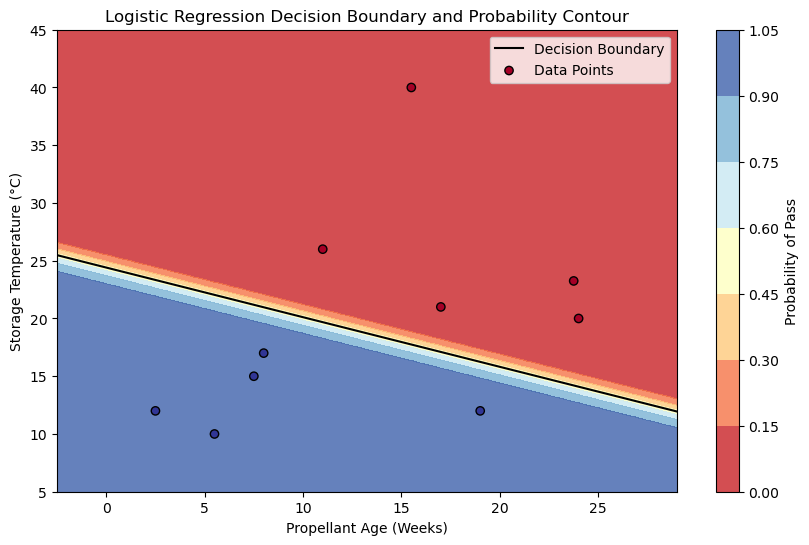

In [9]:
# Plotting
x1_plot = np.linspace(x_in_age.min() - 5, x_in_age.max() + 5, 100)
x2_plot = np.linspace(x_in_temp.min() - 5, x_in_temp.max() + 5, 100)
x1_grid, x2_grid = np.meshgrid(x1_plot, x2_plot)
z = -w[0] - w[1] * x1_grid - w[2] * x2_grid
p = 1 / (1 + np.exp(z))

plt.figure(figsize=(10, 6))
plt.contourf(x1_grid, x2_grid, p, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.colorbar(label='Probability of Pass')

decision_boundary = -w[0] / w[2] - (w[1] / w[2]) * x1_plot
plt.plot(x1_plot, decision_boundary, color='black', linestyle='-', label='Decision Boundary')

plt.scatter(x_in_age, x_in_temp, c=y_in, cmap=plt.cm.RdYlBu, edgecolor='k', label='Data Points')
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title('Logistic Regression Decision Boundary and Probability Contour')
plt.legend()
plt.savefig('log_regression3.tif', dpi=1200)
plt.show()